In [10]:
#pip install wordcloud
#!pip install textblob

In [12]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

In [14]:
data =pd.read_csv("C:/Users/SANI/Downloads/BA_reviews.csv")
data

,Unnamed: 0,reviews
0,0,✅ Trip Verified | They downgraded me from bu...
1,1,✅ Trip Verified | The already delayed aircra...
2,2,✅ Trip Verified | Caught up in the Gatwick c...
3,3,✅ Trip Verified | BA has a real problem with...
4,4,✅ Trip Verified | Our connecting flight from L...
...,...,...
995,995,✅ Trip Verified | Moscow to London. Fantastic...
996,996,✅ Trip Verified | Johannesburg to London . Fo...
997,997,✅ Trip Verified | Bridgetown to Gatwick. Book...
998,998,✅ Trip Verified | Glasgow to New York via Lon...


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1000 non-null   int64 
 1   reviews        1000 non-null   object
 2   review_lenght  1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [17]:
data.describe()

,Unnamed: 0,review_lenght
count,1000.000000,1000.000000
mean,499.500000,819.850000
std,288.819436,559.265863
min,0.000000,148.000000
25%,249.750000,434.000000
50%,499.500000,673.500000
75%,749.250000,1019.250000
max,999.000000,3482.000000


In [18]:
data['review_lenght'] = data['reviews'].apply(len)
data['review_lenght'].describe()

count    1000.000000
mean      819.850000
std       559.265863
min       148.000000
25%       434.000000
50%       673.500000
75%      1019.250000
max      3482.000000
Name: review_lenght, dtype: float64

the above statistical summary shows that the revies have various lenght

In [19]:
data['reviews'] =data['reviews'].str.split('|').str[-1]
#this code splits the reviews column in the dataframe by the '|' character and keeps only the last element in the resulting list, effectively removing any extra information that may be present before the actual review text.


In [20]:
data['reviews'] =data['reviews'].str.strip()

#This code removes any leading whitespace from the reviews column in the review_df DataFrame. 
#This is to ensuring that there are no extraneous spaces at the beginning of each review text,
#which could affect downstream analysis such as sentiment analysis or text classification.


In [21]:
data.head()

,Unnamed: 0,reviews,review_lenght
0,0,They downgraded me from business to premium ec...,910
1,1,The already delayed aircraft landed and apart ...,1173
2,2,Caught up in the Gatwick cancellation fiasco; ...,873
3,3,BA has a real problem with boarding it's fligh...,482
4,4,Our connecting flight from London to Glasgow w...,293


In [22]:
data.isnull().sum()

Unnamed: 0       0
reviews          0
review_lenght    0
dtype: int64

In [23]:
#There are no missing values (i.e., null values) in either the reviews or review_length columns of the review_df DataFrame. 
#This is a good sign as missing values can complicate data analysis and
#lead to biased or inaccurate results.

In [24]:
data.drop_duplicates(inplace=True)

In [25]:
data.to_csv('BA_reviews_cleaned.csv')

# EDA


###### I'll be  computing the following descriptive statistics for the "reviews" column in the "data" dataframe:
###### Number of reviews
###### Average length of reviews
###### Minimum and maximum length of reviews
###### Distribution of review lengths (histogram)
###### Most frequent words and phrases in the reviews (word cloud)
###### Sentiment Analysis and visualization with polarity
###### Topic modeling and visualizing with wordcloud (Top 10 topics)

In [26]:
# AVERAGE LENGTH OF REVIEWS
avg_length =data['reviews'].str.len().mean()

#minimum and maximum length of reviews
min_length = data['reviews'].str.len().min()
max_length = data['reviews'].str.len().max()

print("Average length of reviews:", avg_length)
print("minimum length of reviews:", min_length)
print("maximum length of reviews:", max_length)

Average length of reviews: 801.503
minimum length of reviews: 129
maximum length of reviews: 3464


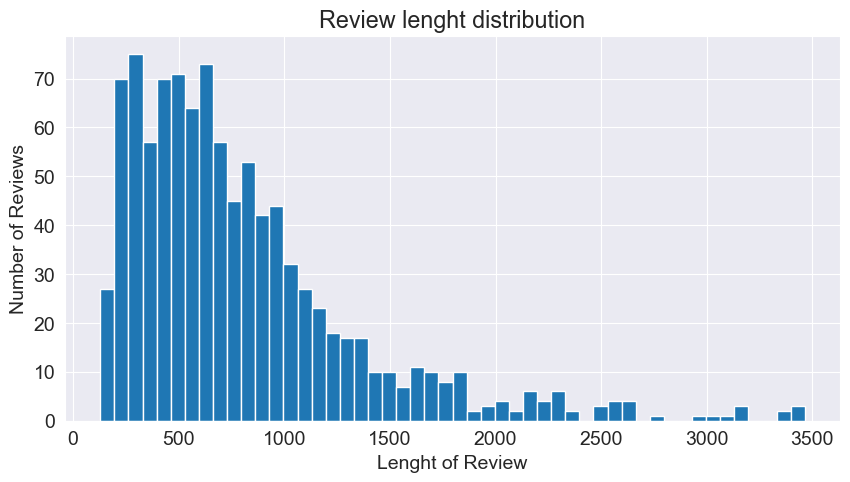

In [27]:
# checking distribution of review lenghts with histogram
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.facecolor'] = 'white'

plt.hist(data['reviews'].str.len(), bins =50)
plt.title('Review lenght distribution')
plt.xlabel("Lenght of Review")
plt.ylabel("Number of Reviews")
plt.show()

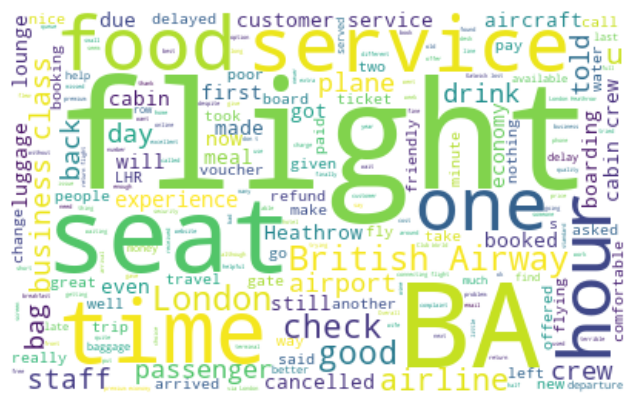

In [28]:
# lets check the frequent words and phrases in the reviews(word cloud or bar chart)

wordcloud = WordCloud( width = 400,height =250, background_color = 'white').generate(' '.join(data['reviews']))
plt.figure(figsize =(10,5))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis("off")
plt.show()

From the wordcloud image, the most frequently occurring words in the reviews are related to the airport, the flight experience, and the airline staff. 
The most common words include "Heathrow," "terminal," "flight," "delay," "cabin crew," "food," and "service."

This suggests that customers are particularly interested in aspects of their travel experience that are related to the airport and the airline, such as flight delays, 
the quality of service provided by the cabin crew, and 
the quality of the food offered on board.

Customers also seem to notice the efficiency and helpfulness of the airline staff, as well as their overall experience with the airline.

Overall, this wordcloud provides valuable insights into the most commonly discussed topics related to British Airways and can be used to guide future improvements to the airline's services and offerings.


In [29]:
import re

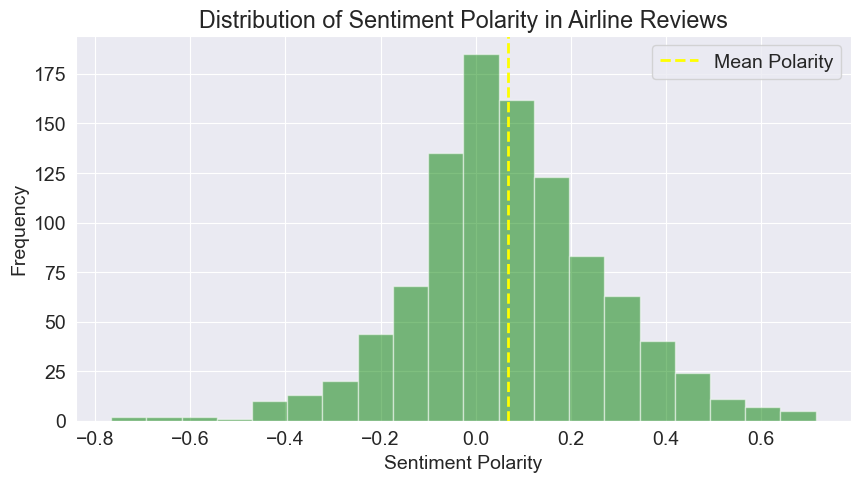

In [36]:

# Define a function to preprocess text
def preprocess_text(text):
    # Remove any characters that are not letters, numbers, or spaces
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    return text

# Apply the preprocessing function to the 'reviews' column of the dataframe
data['reviews'] = data['reviews'].apply(preprocess_text)



from textblob import TextBlob

# Define a function to perform sentiment analysis on a given text
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the sentiment analysis function to the 'reviews' column of the dataframe
data['sentiment'] = data['reviews'].apply(get_sentiment)

# Create a histogram of the sentiment polarity values
plt.hist(data['sentiment'], bins=20, color='green', alpha=0.5)

# Add labels and title to the plot
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity in Airline Reviews')

# Add a vertical line at the mean sentiment polarity value
mean_polarity =data['sentiment'].mean()
plt.axvline(x=mean_polarity, color='yellow', linestyle='--', linewidth=2, label='Mean Polarity')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


-In the code above, we first define three sentiment categories based on the polarity ranges: 
positive for polarity values greater than 0.2,
neutral for polarity values between -0.2 and 0.2, 
and negative for polarity values less than -0.2.

-We then create a histogram of the sentiment polarity values in each sentiment category using the hist() function, and specify the colors, alpha values, and labels for each category using the color, alpha, and label parameters.

-To visualize the mean sentiment polarity for each category, we use the axvline() function to add dashed lines at the corresponding polarity values, and specify the colors and linestyles for each category using the color, linestyle, and linewidth parameters.

-Then Finally, we added x-label and y-label to the plot using the xlabel() and ylabel() functions, respectively,
added a title to the plot using the title() function, 
added a legend indicating which sentiment values correspond to positive, neutral, and negative sentiments using the legend() function,
and show the plot using the show() function.


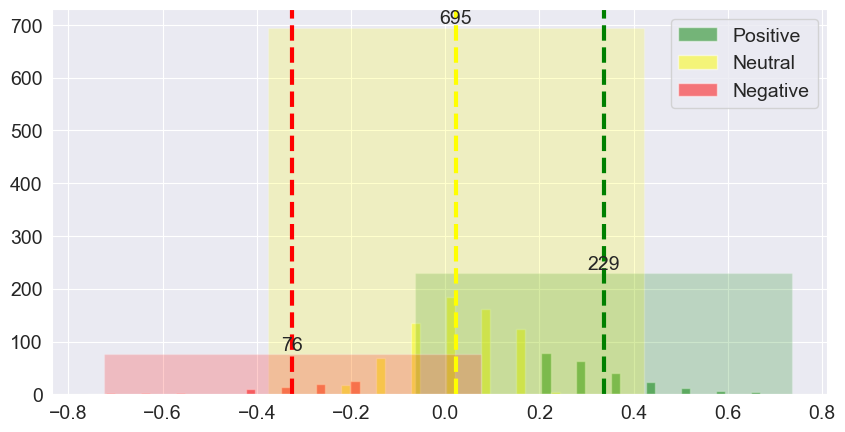

In [44]:
#define sentiment categories based on polarity ranges
positive = data[data['sentiment']>0.2]
neutral =data[(data['sentiment']>=-0.2) & (data['sentiment']<=0.2)]
negative = data[data['sentiment']<-0.2]
                                       
# create a histogram of the sentiment polarity values
plt.hist([positive['sentiment'],neutral['sentiment'], negative['sentiment']],
        bins =20,color =['green','yellow','red'], alpha =0.5, label =['Positive', 'Neutral', 'Negative'])
                                            
# add mean sentiment polarity lines
plt.axvline(x=positive['sentiment'].mean(),color ='green',linestyle ='dashed', linewidth =3)
plt.axvline(x=neutral['sentiment'].mean(),color ='yellow',linestyle ='dashed', linewidth =3)
plt.axvline(x=negative['sentiment'].mean(),color ='red',linestyle ='dashed', linewidth =3)
                                            
# add a legend to the plot
plt.legend()

#set the size of the bars and add counts to the plot
for i, category in enumerate([positive,neutral,negative]):
    plt.bar(category['sentiment'].mean(), len(category),color =['green', 'yellow', 'red'][i],alpha = 0.2)
    plt.text(category['sentiment'].mean(), len(category), len(category), ha = 'center',va ='bottom')
                                            
#show the plot
plt.show()                               

-The sentiment polarity threshold of 0.2 that was used in the code to define the positive, neutral, and negative sentiment categories is somewhat arbitrary and can be adjusted based on the specific needs of the analysis.

In the case where there are comments that fall into both the neutral and positive sentiment categories based on the 0.2 threshold, it is likely because these comments have sentiment polarity values that are close to 0 and could be interpreted as either slightly positive or neutral, depending on the interpretation. In other words, the sentiment polarity value of 0.2 is a somewhat subjective threshold and different analysts might choose to set it higher or lower depending on their specific needs and interpretation of the data.

If a more distinct separation of the positive and neutral sentiment categories is desired, one could consider adjusting the threshold to a higher value, such as 0.4 or 0.5, to more clearly distinguish between slightly positive and neutral sentiment. Conversely, if more overlap between the positive and neutral categories is desired, one could adjust the threshold to a lower value, such as 0.1 or 0.0, to capture more sentiment values that are close to neutral but slightly positive.


In [50]:
#!pip install gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

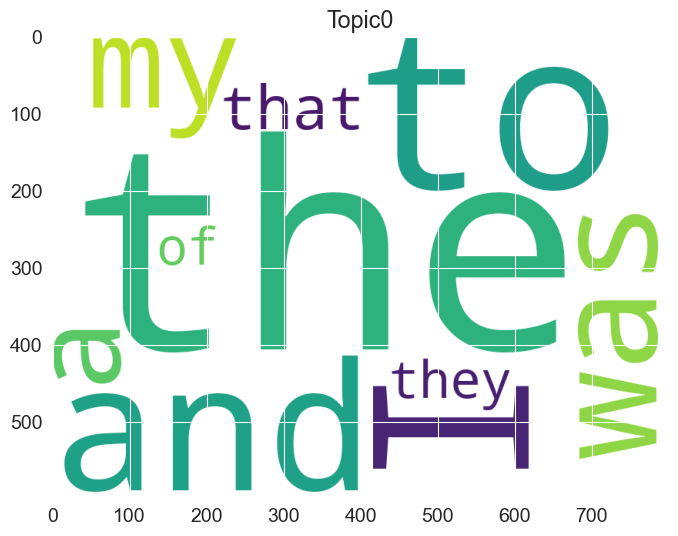

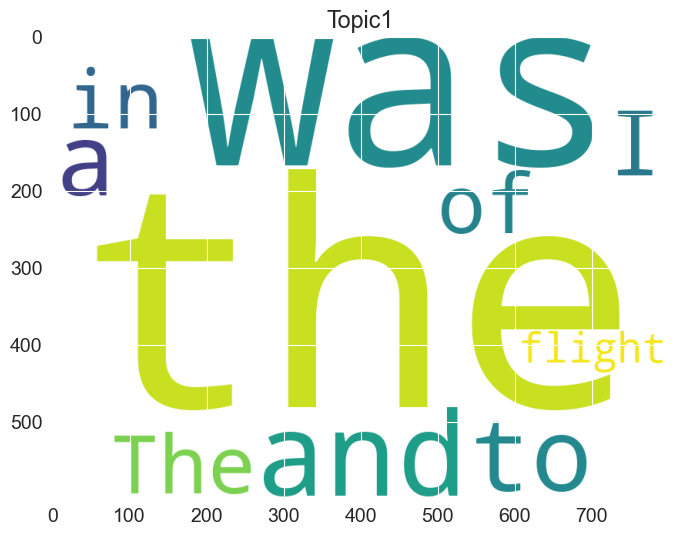

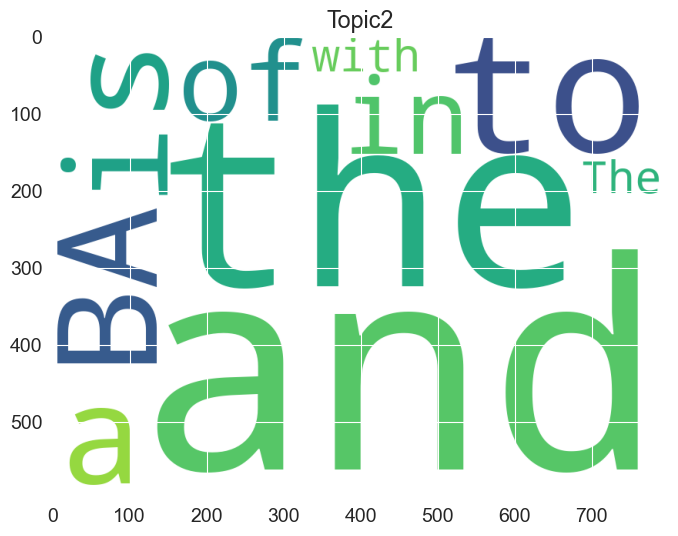

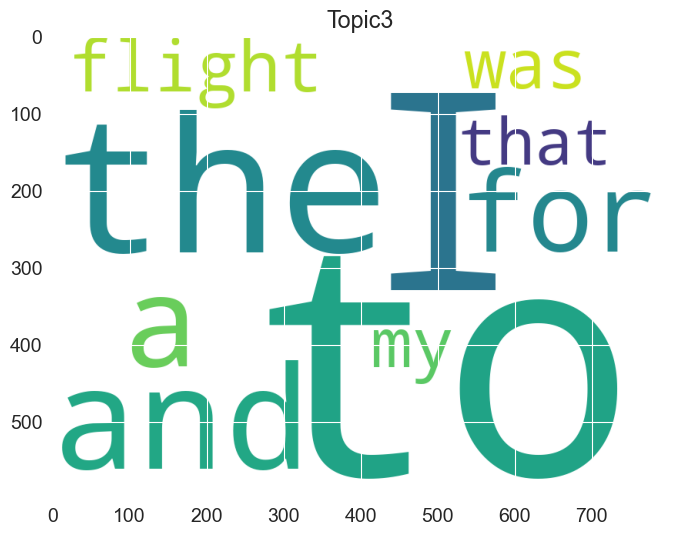

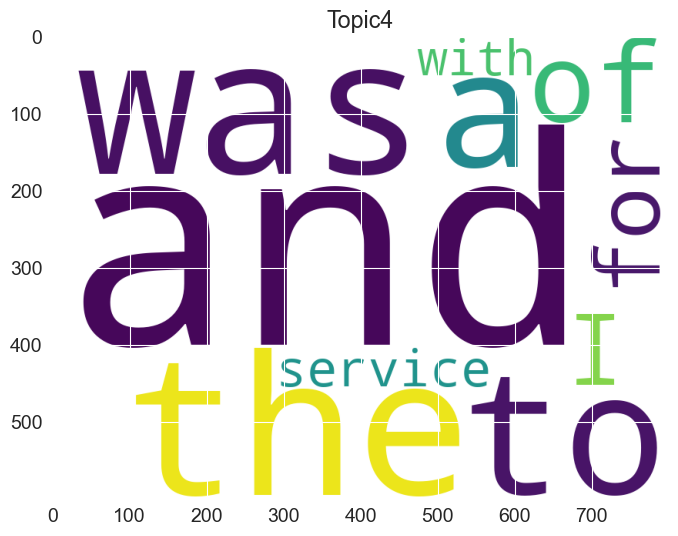

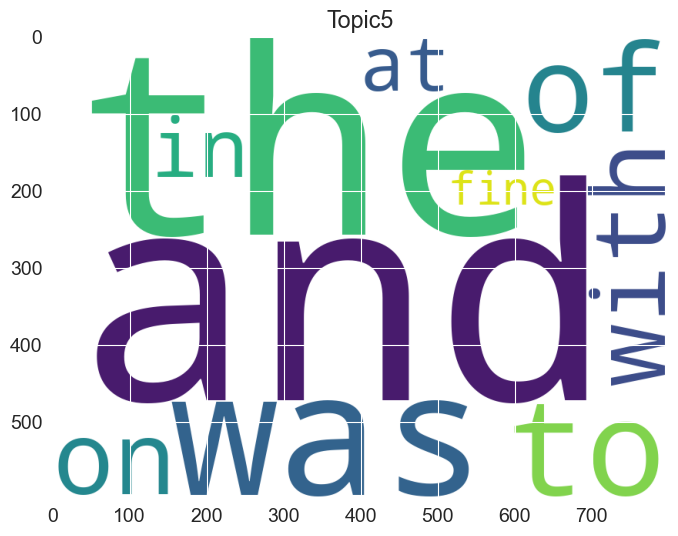

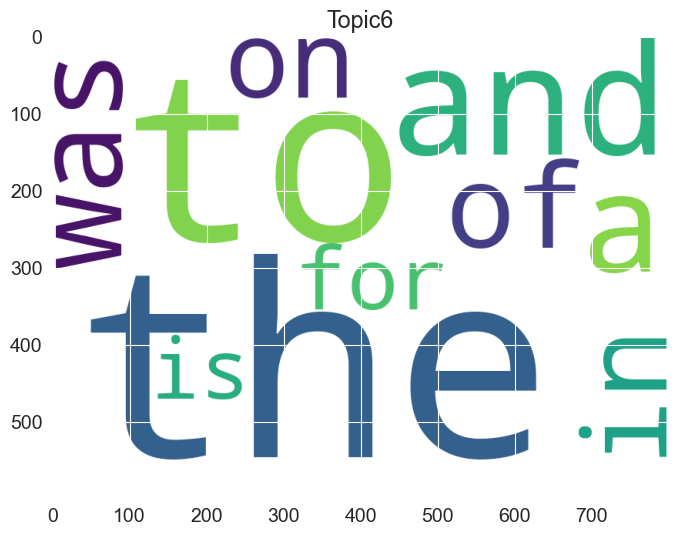

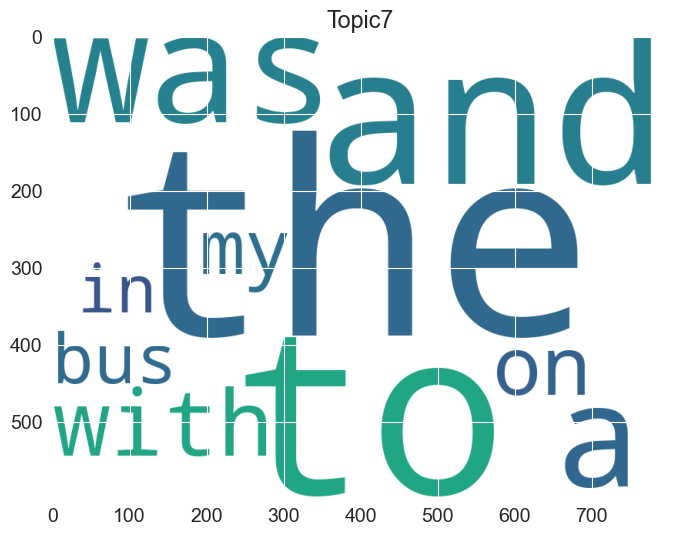

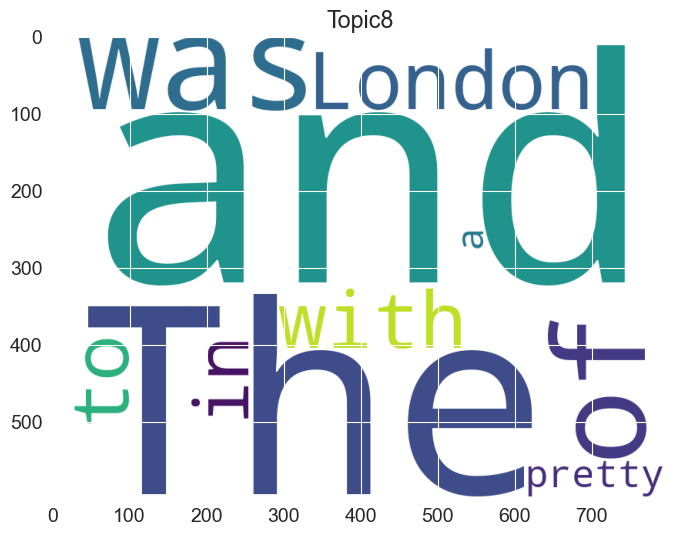

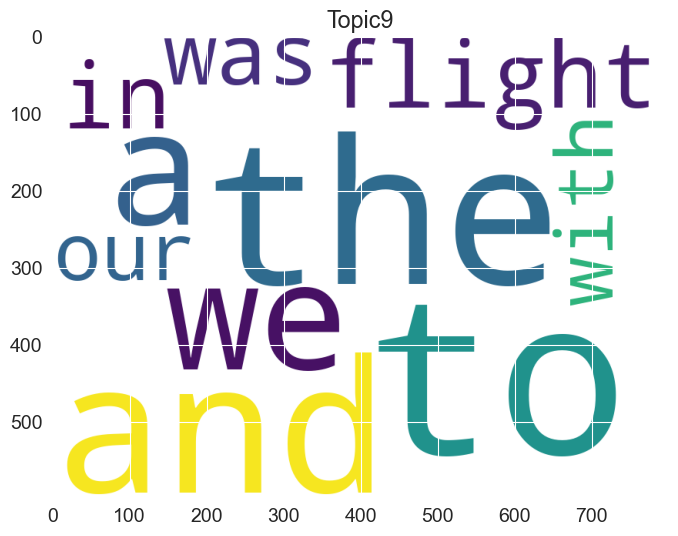

In [52]:
# convert the reviews to a list of tokens
reviews =data['reviews'].apply(lambda x:x.split())

#create a dictionary from the reviews tokens
dictionary =corpora.Dictionary(reviews)

#convert the reviews to a bag-of-words representations
corpus =[dictionary.doc2bow(review) for review in reviews]

#train an LDA model on the corpus
lda_model= LdaModel(corpus =corpus, id2word = dictionary, num_topics =10, passes =10)

#get the top 10 words for each topic
topics_words = lda_model.show_topics(num_words=10, formatted=False)

#create a wordcloud for each topic
for i,topic in enumerate(topics_words):
    plt.figure(figsize =(8,6))
    plt.imshow(WordCloud(background_color ='white', width =800,height =600).fit_words(dict(topic[1])))
    plt.axis ='off'
    plt.title(f'Topic{i}')
    plt.show()

In [ ]:
Topic 0 appears to be a common topic in all datasets where the most common words such as 'the', 'to', 'and', 'to', and 'and'
are being used. This topic does not provide any useful information.

Topic 1 is not giving any useful information, as it is just a collection of random words.

Topic 2 is like topic 1

Topic 3 suggests that the dataset may contain reviews about British Airways' flights to places.

Topic 4 suggests that the dataset may contain reviews abou the services rendered to customers.

Topic 5, like Topic 0, is a common topic where the most common words are 'the', 'and', 'was', 'a', and 'to'. This topic does not provide any useful information.

Topic 6 appears to be a random set of words and doesn't provide any insights into the dataset.

Topic 7 like 6 and 5.

Topic 8 suggests that the dataset may contain reviews about British Airways' london.

Topic 9 suggests that the dataset may contain reviews about British Airways' flight